<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Загрузка-и-обзор" data-toc-modified-id="Загрузка-и-обзор-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка и обзор</a></span></li><li><span><a href="#Анализ-пропусков-и-выбросов" data-toc-modified-id="Анализ-пропусков-и-выбросов-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Анализ пропусков и выбросов</a></span></li><li><span><a href="#Преобразование-текста" data-toc-modified-id="Преобразование-текста-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Преобразование текста</a></span></li><li><span><a href="#Векторизация-текста" data-toc-modified-id="Векторизация-текста-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Векторизация текста</a></span></li><li><span><a href="#Разделение-набора-данных-на-выборки" data-toc-modified-id="Разделение-набора-данных-на-выборки-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Разделение набора данных на выборки</a></span></li><li><span><a href="#Выводы-после-подготовки-данных" data-toc-modified-id="Выводы-после-подготовки-данных-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Выводы после подготовки данных</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Dummy-model" data-toc-modified-id="Dummy-model-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Dummy model</a></span></li><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li><li><span><a href="#LGBMClassifier" data-toc-modified-id="LGBMClassifier-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>LGBMClassifier</a></span></li><li><span><a href="#Выводы-после-обучения" data-toc-modified-id="Выводы-после-обучения-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Выводы после обучения</a></span></li><li><span><a href="#F1-на-тестовой-выборке" data-toc-modified-id="F1-на-тестовой-выборке-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>F1 на тестовой выборке</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Семантический анализ текстов

Интернет-магазин запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.


**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

In [109]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, wordnet

from tqdm.notebook import tqdm

from sklearn.utils import resample
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
from sklearn.model_selection import ParameterGrid, train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

### Загрузка и обзор

In [2]:
# Read dataset and print shape
try:
    df = pd.read_csv('toxic_comments.csv')
except:
    df = pd.read_csv('/datasets/toxic_comments.csv')
df.shape

(159292, 3)

* Исходный набор данных имеет 159292 объекта, два признака и один целевой признак `toxic`.
* Посмотрим внимательнее на признаки, проверим пропуски в данных.

In [3]:
# Print the header
df.head()

,Unnamed: 0,text,toxic
0,0,Explanation\nWhy the edits made under my usern...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\nMore\nI can't make any real suggestions on ...",0
4,4,"You, sir, are my hero. Any chance you remember...",0


In [4]:
# Describe DataFrame
df.describe()

,Unnamed: 0,toxic
count,159292.000000,159292.000000
mean,79725.697242,0.101612
std,46028.837471,0.302139
min,0.000000,0.000000
25%,39872.750000,0.000000
50%,79721.500000,0.000000
75%,119573.250000,0.000000
max,159450.000000,1.000000


In [5]:
# Check Nan
print(f'Total number of NaN values: {df.isna().sum().sum()}')

Total number of NaN values: 0


In [6]:
# Check for empty cells containing strings
empty_cells = df.isnull() | (df == '')
any_empty_cells = empty_cells.any(axis=1)
print(f'Количество пустых значений: {any_empty_cells.sum()}')

Количество пустых значений: 0


* Столбец `Unnamed: 0` имеет max значение 159450, при этом в наборе данных 159292 объекта. Возможно, что это столбец изначально был индексом, но часть объектов была удалена.
* Для проекта он нам не потребуется, удалим его. Предварительго сохраним набор данных в переменную `df_raw`

### Анализ пропусков и выбросов

In [7]:
# Drop wrong column
df_raw = df.copy()
df.drop(columns=['Unnamed: 0'], inplace=True)
df.shape

(159292, 2)

In [8]:
# Print the header
df.head(2)

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0


In [9]:
# Check balance of classes
print(f'Доля положительного класса: {(df.toxic.sum()/df.shape[0]):.3f}')

Доля положительного класса: 0.102


* Ранее мы уже видели, что среднее значение в столбце `toxic` примерно равно 0.10. Это значит, что примерно 10% значений и меют положительный признак, другими словами это доля токсичных комментариев в нашем наборе данных.

* Посмотрим внимательнее на значения признака `text`. Вычислим максимальное значение символов в строке:

In [10]:
# Calculate the maximum length of strings in each row
max_lengths = (df.apply(lambda row: max([len(str(val)) for val in row]), axis=1)
               .to_frame().rename(columns={0:'len'}))
print(f'Максимум знаков в строке: {max_lengths.len.max()}')

Максимум знаков в строке: 5000


* Посмотрим на распределение длины строк в нашем наборе данных. Построим boxplot:

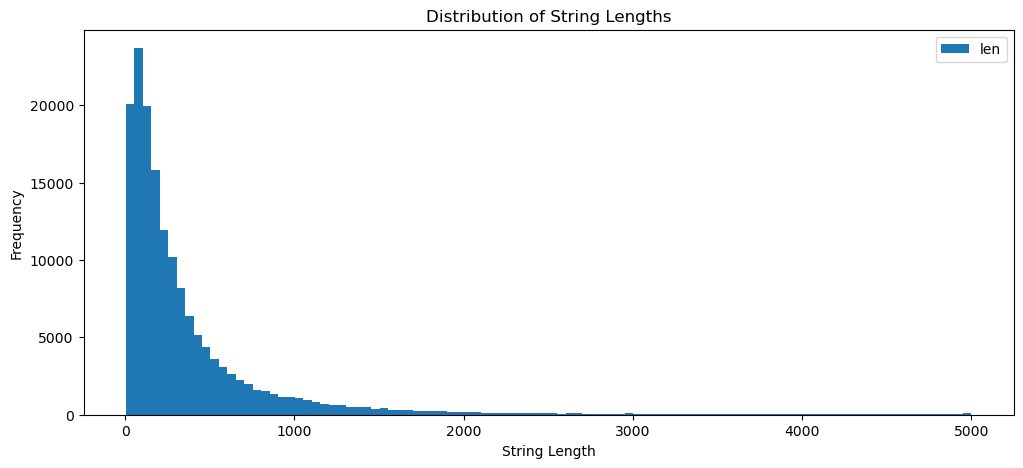

In [11]:
# Plot the histogram of string lengths
max_lengths.plot(kind='hist', bins=100, figsize=(12,5))

# Add title and axis labels
plt.title("Distribution of String Lengths")
plt.xlabel("String Length")
plt.ylabel("Frequency")

# Display the histogram
plt.show()

* Распределение имеет вид логнормального.
* Для решения задачи класификации текстов нам предстоит трансформация текста в вектора, обучение для больших текстов будет ресурсозатратное. Необходимо оценить максимальное количество слов в строке, после лемматизации и очистки.

* На следующем этапе необходимо преобразовать значения в столбце `text`. Провести очистку и лемматизацию.

### Преобразование текста

* Текст все еще содержит элементы не несущие полезной информации от которых нужно избавиться. Очистим текст от цифр и знаков препинания.
* Преобразуем в нижний регистр.
* Проведем лемматизацию слов.

In [18]:
# Change type of case
df['text'] = df['text'].str.lower()

In [19]:
# Remove newline character from string values
df['text'] = df['text'].str.replace('\n', ' ')

* Создадим функции для преобразования текста.

In [20]:
# Create func for clearing text OLD


def clear_text(text):
    # remove URLs
    text = re.sub(r'http\S+', '', text)
    # remove punctuation 
    text = re.sub(r'[^\w\s]', '', text)
    # remove numbers
    text = re.sub(r'\d+', '', text)
    return text

#### Лемматизация V1

In [21]:
# Create the func to lemmatize the words V1

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)


def lem_text_v1(text):  
    wnl = WordNetLemmatizer()
    lemmatized_words = [wnl.lemmatize(word, get_wordnet_pos(word)) for word in word_tokenize(text)]
    return " ".join(lemmatized_words)

In [22]:
%%timeit -n 100
# Time of lemmatize the words V1
lem_text_v1(clear_text('The striped bats are hanging on their feet for best'))

The slowest run took 12.79 times longer than the fastest. This could mean that an intermediate result is being cached.
9.97 ms ± 14.4 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [23]:
# lemmatize the words V1
lem_text_v1(clear_text('The striped bats are hanging on their feet for best'))

'The strip bat be hang on their foot for best'

* Лематизация с помощью nltk.corpus.wordnet 
    * 9.97 ms на фразу
    * Результат: _'The strip bat be hang on their foot for best'_ - обратим внимание на 'strip', это единственный из опробованных подходов который обработал 'striped'.

#### Лемматизация V2

In [24]:
# Create the func to lemmatize the words V2


def lem_text_v2(text):
    wnl = WordNetLemmatizer()
    tokens = word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    lemmatized_words = []
    for word, tag in pos_tags:
        if tag.startswith('NN'):
            # noun
            lemmatized_words.append(wnl.lemmatize(word, pos='n'))
        elif tag.startswith('VB'):
            # verb
            lemmatized_words.append(wnl.lemmatize(word, pos='v'))
        elif tag.startswith('JJ'):
            # adjective
            lemmatized_words.append(wnl.lemmatize(word, pos='a'))
        elif tag.startswith('R'):
            # adverb
            lemmatized_words.append(wnl.lemmatize(word, pos='r'))
        else:
            # other parts of speech
            lemmatized_words.append(word)
    return " ".join(lemmatized_words)

In [25]:
%%timeit -n 100
# Time of lemmatize the words V2
lem_text_v2(clear_text('The striped bats are hanging on their feet for best'))

1.67 ms ± 271 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [26]:
# lemmatize the words V2
lem_text_v2(clear_text('The striped bats are hanging on their feet for best'))

'The striped bat be hang on their foot for best'

* Лематизация с помощью elif определением части речи.
    * 1.67 ms на фразу
    * Результат: _'The **striped** bat be hang on their foot for best'_ 

#### Лемматизация V3

In [27]:
# Create the func to lemmatize the words V2
from nltk import pos_tag
wnl = WordNetLemmatizer()

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n' 

def lem_text_v3(text): 
    # Text input is string, returns lowercased strings.
    return " ".join([wnl.lemmatize(word, pos=penn2morphy(tag)) 
            for word, tag in pos_tag(word_tokenize(text))])

In [28]:
%%timeit -n 100
lem_text_v3('The striped bats are hanging on their feet for best')

1.67 ms ± 354 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [29]:
lem_text_v3('The striped bats are hanging on their feet for best')

'The striped bat be hang on their foot for best'

* Лематизация с помощью dictionary и определением части речи.
    * 1.67 ms на фразу
    * Результат: _'The **striped** bat be hang on their foot for best'_ 

#### Выводе после лемматизации

Мной были протестированы три подхода для лемматизации текста из набора данных.
Выбран был первый подход, самый качественный из опробованных и самый медленный.
* Лематизация V1 с помощью nltk.corpus.wordnet 
    * 9.97 ms на фразу
    * Результат: _'The strip bat be hang on their foot for best'_ - обратим внимание на 'strip', это единственный из опробованных подходов который обработал 'striped'.


In [ ]:
# Apply the functions
tqdm.pandas()
df['text'] = df['text'].progress_apply(lambda x: lem_text_v1(clear_text(x)))

# Calculate the maximum length of strings in each row
max_lengths = (df.apply(lambda row: max([len(str(val)) for val in row]), axis=1)
               .to_frame().rename(columns={0:'len'}))
print(f'Максимум знаков в строке: {max_lengths.len.max()}')

In [111]:
# Save result to df
# df.to_csv('df_lem.csv', index=False)

In [112]:
# Upload df_lem
df = pd.read_csv('df_lem.csv')
df.head(10)

,text,toxic
0,explanation why the edits make under my userna...,0
1,d aww he match this background colour i m seem...,0
2,hey man i m really not try to edit war it s ju...,0
3,more i can t make any real suggestion on impro...,0
4,you sir be my hero any chance you remember wha...,0
5,congratulation from me a well use the tool wel...,0
6,cocksucker before you piss around on my work,1
7,your vandalism to the matt shirvington article...,0
8,sorry if the word nonsense be offensive to you...,0
9,alignment on this subject and which be contrar...,0


In [33]:
# drop rows with NaN or non-string values
df = df.dropna(subset=['text'])
df = df[df['text'].apply(lambda x: isinstance(x, str))]

# define a function to count the number of words in a string
def count_words(text):
    return len(text.split())

# apply the function to the 'text' column and find the maximum word count
max_word_count = df['text'].apply(count_words).max()

# print the result
print("The maximum number of words in a row is:", max_word_count)

The maximum number of words in a row is: 1403


### Разделение набора данных на выборки

* Для работы с моделями выбран подход с использованием трех выборок, обучающей, валидационной и тестовой. Без кросс-валидации.

In [34]:
# Assign features and target
df_features = df.drop(columns='toxic')
df_target = df['toxic']

In [35]:
# Split the dataset into training and test/validation
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, 
                                                     test_size=0.2, stratify=df_target, 
                                                     random_state=41)

# Split into 10% validation and 10% test
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, 
                                                    test_size=0.5, stratify=y_test, 
                                                    random_state=41)

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_valid shape: {X_valid.shape}')
print(f'y_valid shape: {y_valid.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (127424, 1)
y_train shape: (127424,)
X_valid shape: (15928, 1)
y_valid shape: (15928,)
X_test shape: (15929, 1)
y_test shape: (15929,)


### Векторизация текста

1. Векторизацию необходимо обучать на train и затем применять на выборки.
2. Вычислим _TF-IDF_ для корпуса текстов.
3. Для определения тональности применим величины _TF-IDF_ как признаки.
4. При векторизации избавимся от стоп-слов.

In [52]:
%%time
# Create the corpus
corpus = X_train['text'].values
corpus_val = X_valid['text'].values
corpus_test = X_test['text'].values
# Assign stop_words
stop_words = (stopwords.words('english'))
# Create Vectorizer and transform the corpus
count_tf_idf = TfidfVectorizer(stop_words=stop_words, lowercase=False)
tf_idf = count_tf_idf.fit(corpus)
X_train = tf_idf.transform(corpus)
X_valid = tf_idf.transform(corpus_val)
X_test = tf_idf.transform(corpus_test)
# Print result shape
print("Размер матрицы train:", X_train.shape)
print("Размер матрицы valid:", X_valid.shape)
print("Размер матрицы test:", X_test.shape)

Размер матрицы train: (127424, 131455)
Размер матрицы valid: (15928, 131455)
Размер матрицы test: (15929, 131455)
CPU times: user 25.5 s, sys: 125 ms, total: 25.7 s
Wall time: 25.9 s


In [53]:
# Check the type of X_train
type(X_train)

scipy.sparse._csr.csr_matrix

* Обратим внимание, что признаковое пространство значительно увеличилось. Мы имее все тоже количество объектов но уже 131455 признаков.

### Выводы после подготовки данных

* Исходный набор данных состоял из 159292 объектов, двух признаков (один из них удален) и одного целевого признака `toxic`.
* Пропуски в данных или пробелы в значениях не выявлены.
* Для подготовки набора данных к задаче обучения были использованы следующие методы:
    * Преобразование в lowercase
    * Удаление лишних пробелов знаков препинания, цифр.
    * Удаление стоп слов, которые не влияют на _сентимент-анализ_
    * Лемматизация слов
    * Векторизация текста методом _TF-IDF_
* Итоговый размер выборки составил 159292 объектов 131455 признаков.
* Проведена разбивка на обучающую, валидационную и тестовую подвыборки.

## Обучение

Для решения задачи классификации я буду использовать следующие модели:
* LogisticRegression
* RandomForestClassifier
* LGBMClassifier

Качество обученных моделей буду проверять на валидационной выборке, метрика качества F1 мера.

### Dummy model

In [54]:
# Dummy model
y_pred = pd.DataFrame(np.zeros(len(y_test)), index=y_test.index)
print("F1:", f1_score(y_test, y_pred))

F1: 0.0


### LogisticRegression

In [80]:
%%time
# Define a range of hyperparameters to search over
param_grid = {'C': [7, 7.25, 7.5, 7.75, 8, 8.25, 8.5]}

# Create a list of all possible parameter combinations
param_list = list(ParameterGrid(param_grid))

# Initialize an empty list to store the results
results = []

# Loop over all possible parameter combinations
for params in param_list:
    
    # Initialize the model with the current set of hyperparameters
    lr = LogisticRegression(**params,random_state=41,
                                class_weight={0:1,1:9},
                                max_iter=350)
    
    # Train the model on the training data
    lr.fit(X_train, y_train)
    
    # Evaluate the model on the validation data
    y_pred = lr.predict(X_valid)
    score = f1_score(y_valid, y_pred)
    
    # Store the results
    results.append((params, score))
    
# Find the best set of hyperparameters based on validation score
best_params, best_score = max(results, key=lambda x: x[1])

CPU times: user 11min 56s, sys: 3min 28s, total: 15min 25s
Wall time: 4min 26s


In [92]:
print(f'F1 на валидации: {best_score}')
print(f'Лучший гиперпараметр {best_params}')

F1 на валидации: 0.7662116040955631
Лучший гиперпараметр {'C': 7}


* Сделаем замер времени на обучение на лучших гиперпараметрах.

In [102]:
%%time
# Initialize the model with the current set of hyperparameters
lr = LogisticRegression(C=7, random_state=41,
                        class_weight={0:1,1:9},
                        max_iter=350)
# Train the model on the training data
lr.fit(X_train, y_train)
# Evaluate the model on the validation data
y_pred = lr.predict(X_valid)
print("F1:", f1_score(y_valid, y_pred))

F1: 0.7662116040955631
CPU times: user 1min 20s, sys: 23.3 s, total: 1min 44s
Wall time: 31 s


* На дефолтных гиперпараметрах модели и размерах выборки достич целевой F1 меры не удавалось были опробованы все доступные варианты `solver` `penalty` `class_weight` `C`

Ниже можно видеть некоторые котрые показали достойные результаты:
* Выборка 10000 obj 500 max lenght 
    * F1: 0.7198 (penalty='l2', class_weight={0:1,1:9}, solver='lbfgs', max_iter=100)
    * F1: 0.7320 (penalty='l1' class_weight={0:1,1:9}, solver='liblinear')
* Выборка 10000 obj 300 max lenght
    * F1: 0.7510 (penalty='l2', class_weight={0:1,1:9}, solver='liblinear', max_iter=50)
* **Выборка без ограничения размера и длины текста**
    * **F1: 0.7662** (penalty='l2',random_state=41, class_weight={0:1,1:9} solver='lbfgs', max_iter=350, C=7)
    * Wall time: 31 s

### RandomForestClassifier

In [107]:
%%time
# Create the RandomForestRegressor model
rfc = RandomForestClassifier(max_depth=15,random_state=41, class_weight={0:1,1:9}, n_estimators=300) 

# Fit the model on the training data
rfc.fit(X_train, y_train)

# Make predictions on the validation data using the best model
y_pred = rfc.predict(X_valid)

print("F1:", f1_score(y_valid, y_pred))

F1: 0.35511683118830434
CPU times: user 1min 8s, sys: 78.1 ms, total: 1min 8s
Wall time: 1min 10s


* F1 мера на валидационной выборке ниже чем у логистической регрессии.

* F1: 0.3551 (max_depth=15,random_state=41, class_weight={0:1,1:9}, n_estimators=300)
* Wall time: 1min 10s

Переходим к обучению LightGBM

### LGBMClassifier

In [97]:
%%time
# Create the LGBMRegressor model
lgbmc = LGBMClassifier(random_state=41, n_estimators=300)
# Fit the model on the training data
lgbmc.fit(X_train, y_train)
# Make predictions on the validation data using the best model
y_pred = lgbmc.predict(X_valid)
print("F1:", f1_score(y_valid, y_pred))

F1: 0.7918816649466806
CPU times: user 8min 56s, sys: 4.23 s, total: 9min 1s
Wall time: 2min 33s


* Значение F1 на валидационной выборке 0.7918 Wall time: 2min 33s

### Выводы после обучения

На тестах использовались три модели, лучшие значения F1 можно видеть ниже:
* LogisticRegression
    * F1: 0.7662
    * Wall time: 31 s
* RandomForestClassifier
    * F1: 0.3551
    * Wall time: 1min 10s
* LGBMClassifier
    * F1: 0.7918
    * Wall time: 2min 33s
    
Выводы по лучшей модели очевидны - **LGBMClassifier** При этом обучение у нее самое долгое.
Проверим ее на тестовой выборке.

### F1 на тестовой выборке

In [99]:
%%time
#Predict the classes
y_pred = lgbmc.predict(X_test)
# Print F1 score
print("F1:", f1_score(y_test, y_pred))

F1: 0.7710084033613446
CPU times: user 4.94 s, sys: 15.6 ms, total: 4.95 s
Wall time: 1.64 s


F1: 0.7710 на тестовой выборке. Целевое значение F1 достигнуто.

## Выводы

В процессе работы над проектом были проведены анализ и обработка данных:
* Исходный набор данных состоял из 159292 объектов, двух признаков (один из них удален) и одного целевого признака `toxic`.
* Пропуски в данных или пробелы в значениях не выявлены.
* Для подготовки набора данных к задаче обучения были использованы следующие методы:
    * Преобразование в lowercase
    * Удаление лишних пробелов знаков препинания, цифр.
    * Удаление стоп слов, которые не влияют на _сентимент-анализ_
    * Лемматизация слов
    * Векторизация текста методом _TF-IDF_
* Был проведен ресамплинг с учетом баланса признаков.
* Итоговый размер выборки составил 159292 объектов 131455 признаков.
* Проведена разбивка на обучающую, валидационную и тестовую подвыборки.

Для обучения отобраны модели, проведены настройка гиперпараметров, протестированы различные варианты с размером выборки.
* LogisticRegression
    * F1: 0.7662
    * Wall time: 31 s
* RandomForestClassifier
    * F1: 0.3551
    * Wall time: 1min 10s
* LGBMClassifier
    * **F1: 0.7918**
    * Wall time: 2min 33s
    
Неожиданно для меня лучшие значения метрики качества удалось достичь на классификаторе LGBMClassifier. (В прошлой итерации этого проекта была Логистическая регрессия - в этот раз она тоже показала хорошие результаты)
На тестовой выборке эта модель показала следующие значения:
* LGBMClassifier
    * **F1: 0.7710**
    
Целевое значение F1 меры достигнуто.

P.S. LogisticRegression тоже показала результат выше целевого на тестовой выборке, но ниже чем LGBMClassifier.
